

**Importing all the required libraries**

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import zipfile
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [3]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Demand')
    plt.plot(predicted, color='green',label='Predicted Demand')
    plt.title('Demand Prediction')
    plt.xlabel('Time')
    plt.ylabel('Prediction')
    plt.legend()
    plt.show()

# Calculation of Root Mean Squared-Error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
df=pd.read_csv('/workspaces/codespaces-jupyter/data/continuous dataset.csv',index_col=[0],parse_dates=[0])

In [5]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


We only need the nat_demand column



Now, we will calculate only the weekly data for datetime, and nat_demand

In [7]:
df_refined=df['nat_demand'].resample('D').mean()

In [8]:
df_refined

datetime
2015-01-03    1069.266587
2015-01-04    1008.123596
2015-01-05    1146.682925
2015-01-06    1143.394429
2015-01-07    1144.098817
                 ...     
2020-06-23    1137.366342
2020-06-24    1131.196625
2020-06-25    1184.028708
2020-06-26    1106.277696
2020-06-27    1013.568300
Freq: D, Name: nat_demand, Length: 2003, dtype: float64

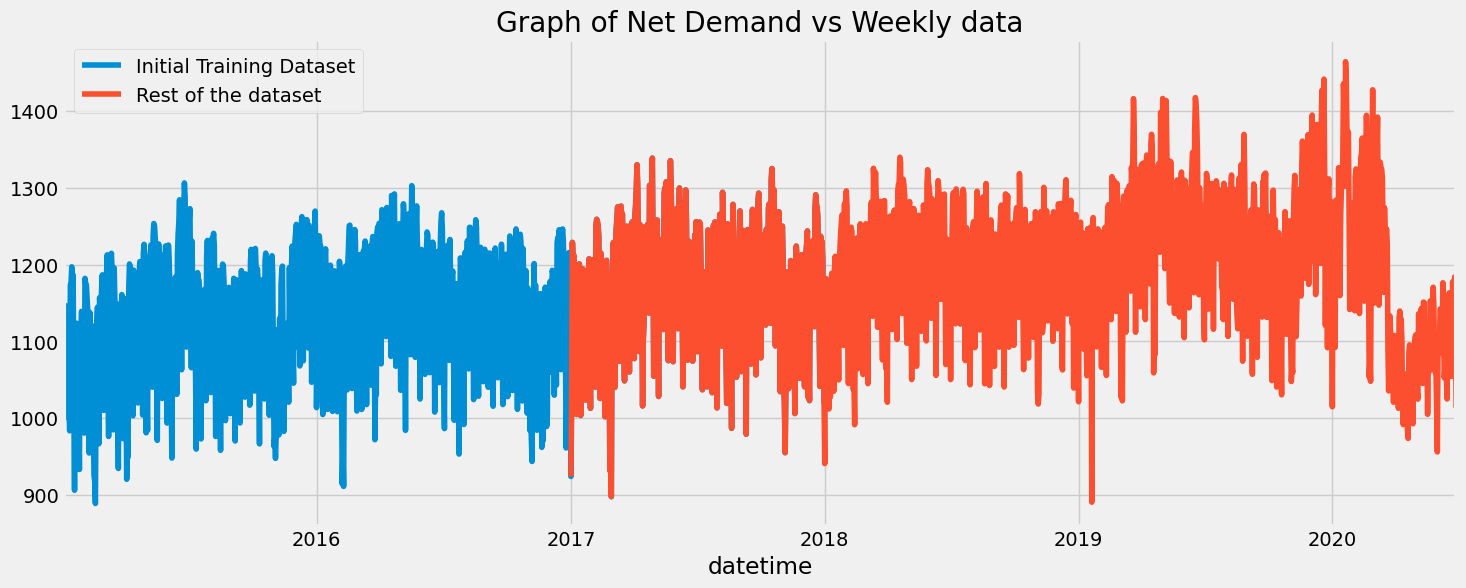

In [9]:
df_refined[:'2017'].plot(figsize=(16,6),legend=True)
df_refined['2017':].plot(figsize=(16,6),legend=True)
plt.legend(['Initial Training Dataset','Rest of the dataset'])
plt.title('Graph of Net Demand vs Weekly data')
plt.show()

Here, we are trying to check the overall trend of the nat_demand

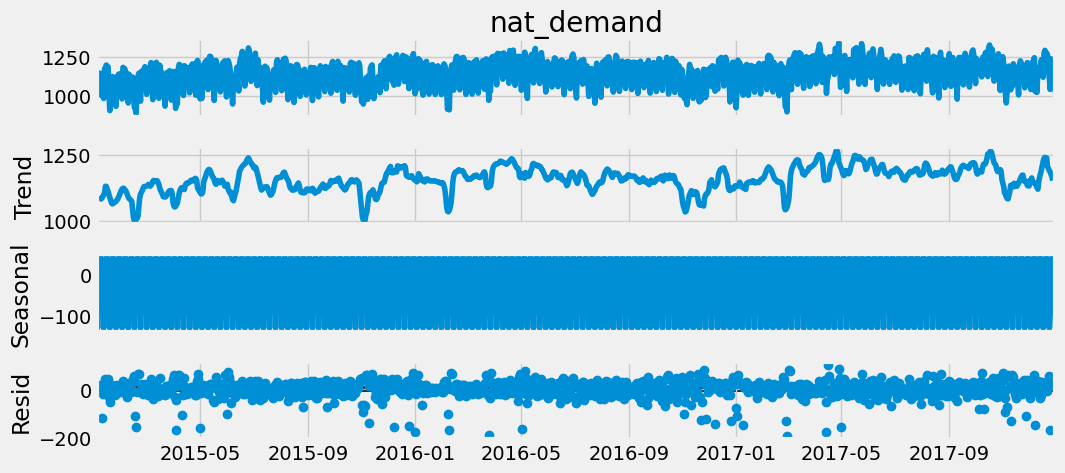

In [10]:
decomp = seasonal_decompose(df_refined[:'2017'])
fig = decomp.plot()
fig.set_figheight(5)
fig.set_figwidth(12)

In [11]:
# Checking for missing values
training_set = df_refined[:'2017'].values
training_set=training_set.reshape((training_set.shape[0],1))

In [12]:
print("Training Set Shape : ",training_set.shape)

Training Set Shape :  (1094, 1)


**Scaling the training set from values 0 to 1**

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled.shape

(1094, 1)

In [15]:
X_train = []
Y_train = []
for i in range(60,1094):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

So, now it takes 60 past values, to give out next value.

**Our GRU Model**

In [17]:
EPOCHS=50

model = Sequential()
model.add(GRU(64, activation='tanh',return_sequences=True, input_shape=(60, 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        17,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,315 (118.42 KB)

 Trainable params: 30,315 (118.42 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=72, shuffle=False)

Epoch 1/50


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1572
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0410
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0407
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0375
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0380
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0352
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0367
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0358
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0348
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0362
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0334
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0341
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0343
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0312
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0297
Epoch 16/50
15/

**Saving the model**

In [19]:
import joblib

In [20]:
joblib.dump(model,'GRU_model')

['GRU_model']